<a href="https://www.kaggle.com/code/avtnshm/sensex-and-nifty-50-analysis?scriptVersionId=158846950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bombay-stock-exchange-bse-sensex-index-2005-2024/CSVForDate (1).xlsx
/kaggle/input/nse-nifty50-historical-data-1990-2024/NIFTY 50_Historical_PR_03071990to12012024.csv


In [2]:
BSE = pd.read_excel('/kaggle/input/bombay-stock-exchange-bse-sensex-index-2005-2024/CSVForDate (1).xlsx')
NSE = pd.read_csv('/kaggle/input/nse-nifty50-historical-data-1990-2024/NIFTY 50_Historical_PR_03071990to12012024.csv')

In [3]:
print(BSE.info())
NSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6989 non-null   datetime64[ns]
 1   Open    6989 non-null   float64       
 2   High    6989 non-null   float64       
 3   Low     6989 non-null   float64       
 4   Close   6989 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 273.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8140 non-null   object 
 1   Date        8140 non-null   object 
 2   Open        7015 non-null   float64
 3   High        7015 non-null   float64
 4   Low         7015 non-null   float64
 5   Close       8140 non-null   float64
dtypes: float64(4), object(2)
memory usage: 381.7+ KB


In [4]:
BSE.head()

,Date,Open,High,Low,Close
0,1995-11-03,3451.20,3470.26,3441.49,3469.40
1,1995-11-06,3472.70,3473.80,3418.43,3425.88
2,1995-11-08,3392.66,3426.05,3364.71,3364.71
3,1995-11-09,3339.33,3339.33,3316.00,3316.00
4,1995-11-10,3288.89,3288.89,3280.06,3287.12


In [5]:
NSE['Date'] = pd.to_datetime(NSE['Date'])

In [6]:
NSE.dropna(inplace=True)

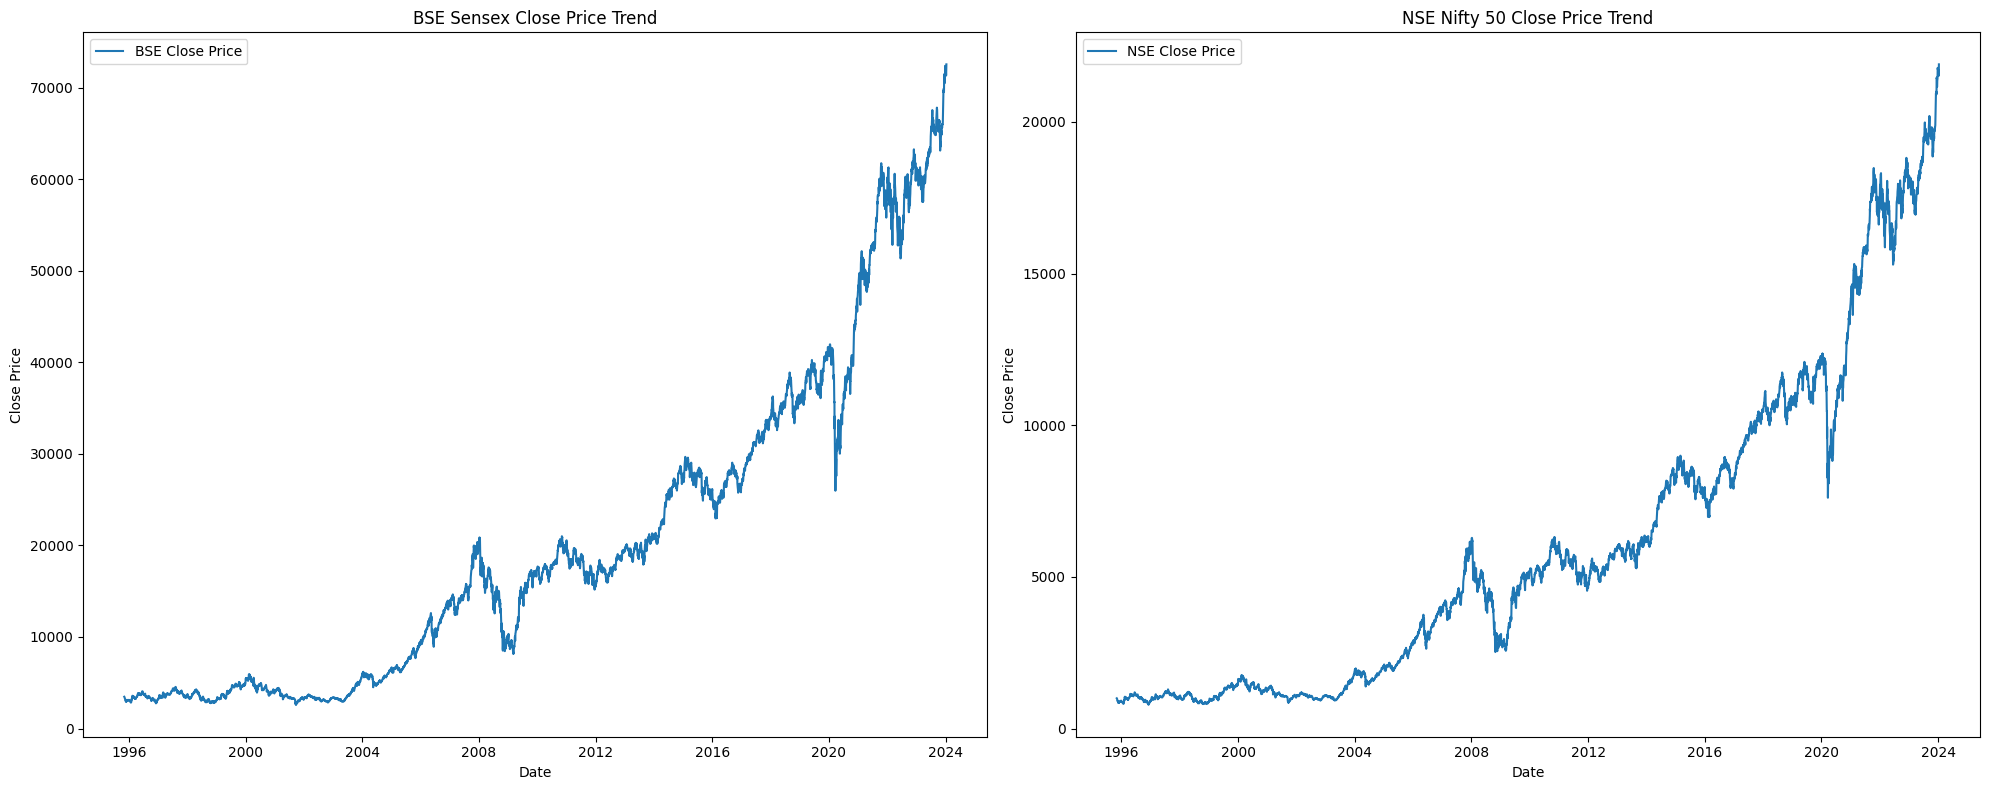

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)  
sns.lineplot(x=BSE['Date'], y=BSE['Close'], label='BSE Close Price')
plt.title('BSE Sensex Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(1, 2, 2) 
sns.lineplot(x=NSE['Date'], y=NSE['Close'], label='NSE Close Price')
plt.title('NSE Nifty 50 Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout() 
plt.show()


In [8]:
import plotly.graph_objects as go

fig_bse = go.Figure(data=[go.Candlestick(x=BSE['Date'],
                                          open=BSE['Open'],
                                          high=BSE['High'],
                                          low=BSE['Low'],
                                          close=BSE['Close'],
                                          name='BSE Sensex')])

fig_bse.update_layout(title='BSE Sensex Candlestick Chart',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=True)

fig_nse = go.Figure(data=[go.Candlestick(x=NSE['Date'],
                                          open=NSE['Open'],
                                          high=NSE['High'],
                                          low=NSE['Low'],
                                          close=NSE['Close'],
                                          name='NSE Nifty 50')])

fig_nse.update_layout(title='NSE Nifty 50 Candlestick Chart',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=True)

fig_bse.show()
fig_nse.show()


In [9]:
merged_data = pd.merge(BSE[['Date', 'Close']], NSE[['Date', 'Close']], on='Date', suffixes=('_BSE', '_NSE'))

correlation_coefficient = np.corrcoef(merged_data['Close_BSE'], merged_data['Close_NSE'])[0, 1]

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")


Pearson Correlation Coefficient: 0.9998


BSE Volatility (Daily Returns Standard Deviation): 0.0146
NSE Volatility (Daily Returns Standard Deviation): 0.0146


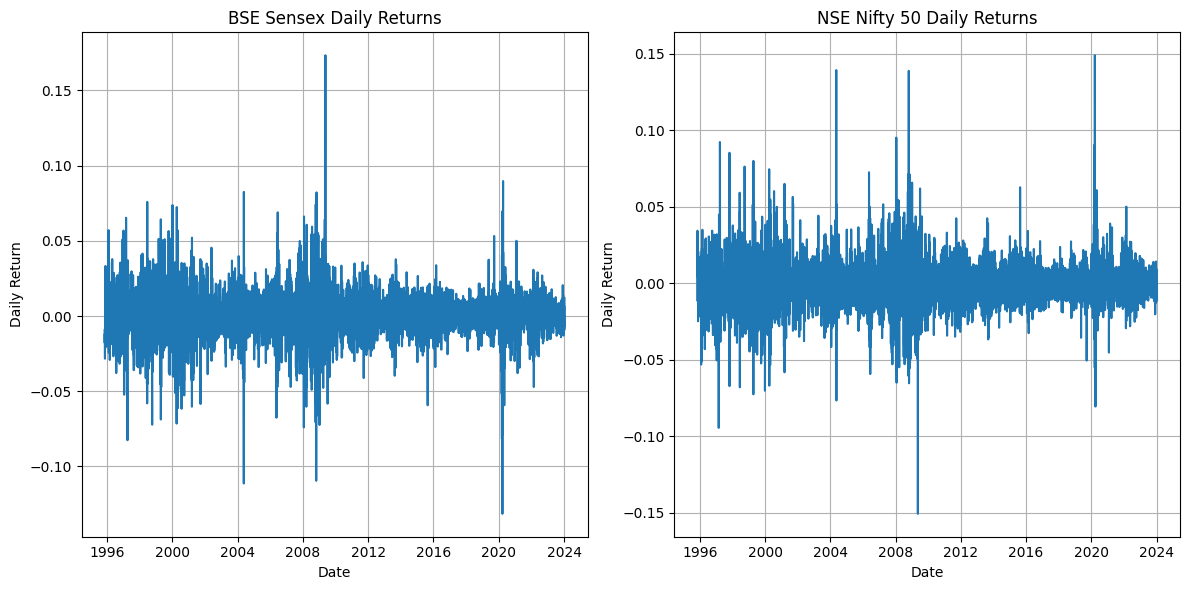

In [10]:
BSE['Daily_Return'] = BSE['Close'].pct_change().dropna()
NSE['Daily_Return'] = NSE['Close'].pct_change().dropna()

volatility_BSE = BSE['Daily_Return'].std()
volatility_NSE = NSE['Daily_Return'].std()

print(f"BSE Volatility (Daily Returns Standard Deviation): {volatility_BSE:.4f}")
print(f"NSE Volatility (Daily Returns Standard Deviation): {volatility_NSE:.4f}")

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(BSE['Date'][1:], BSE['Daily_Return'][1:])
plt.title('BSE Sensex Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(NSE['Date'][1:], NSE['Daily_Return'][1:])
plt.title('NSE Nifty 50 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

plt.tight_layout()
plt.show()

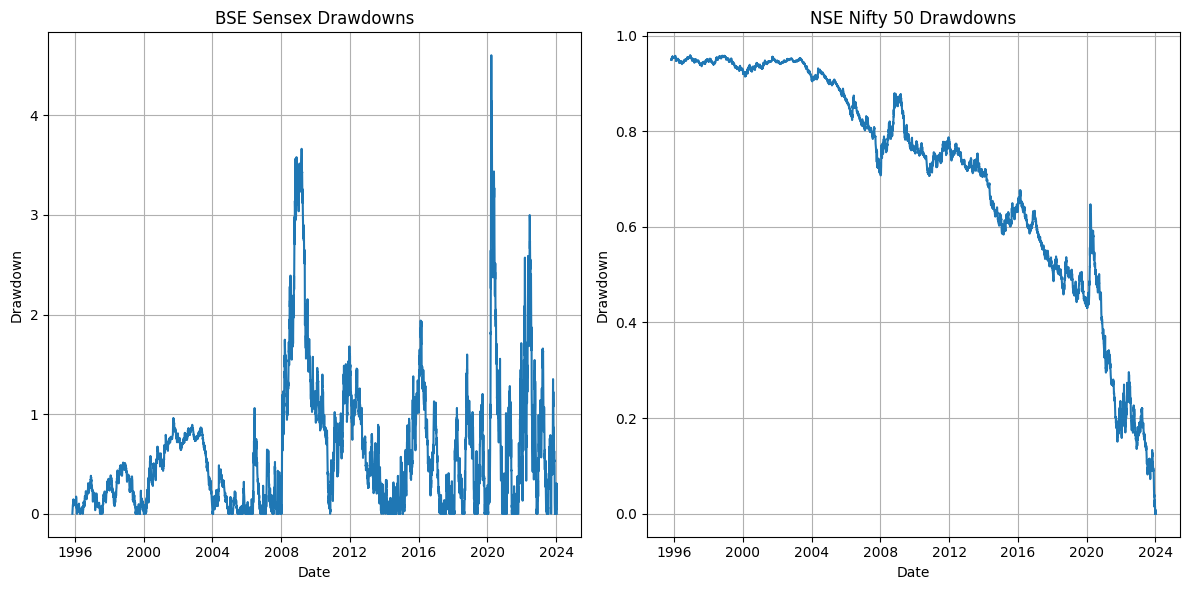

In [11]:
BSE['Cumulative_Return'] = (1 + BSE['Daily_Return']).cumprod()
NSE['Cumulative_Return'] = (1 + NSE['Daily_Return']).cumprod()

BSE['Drawdown'] = (BSE['Cumulative_Return'].cummax() - BSE['Cumulative_Return']).round(4)
NSE['Drawdown'] = (NSE['Cumulative_Return'].cummax() - NSE['Cumulative_Return']).round(4)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(BSE['Date'], BSE['Drawdown'])
plt.title('BSE Sensex Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(NSE['Date'], NSE['Drawdown'])
plt.title('NSE Nifty 50 Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

BSE.set_index('Date', inplace=True)
NSE.set_index('Date', inplace=True)

result_BSE = seasonal_decompose(BSE['Close'], model='multiplicative', period=252)  # Assuming daily data with 252 trading days in a year
result_NSE = seasonal_decompose(NSE['Close'], model='multiplicative', period=252)



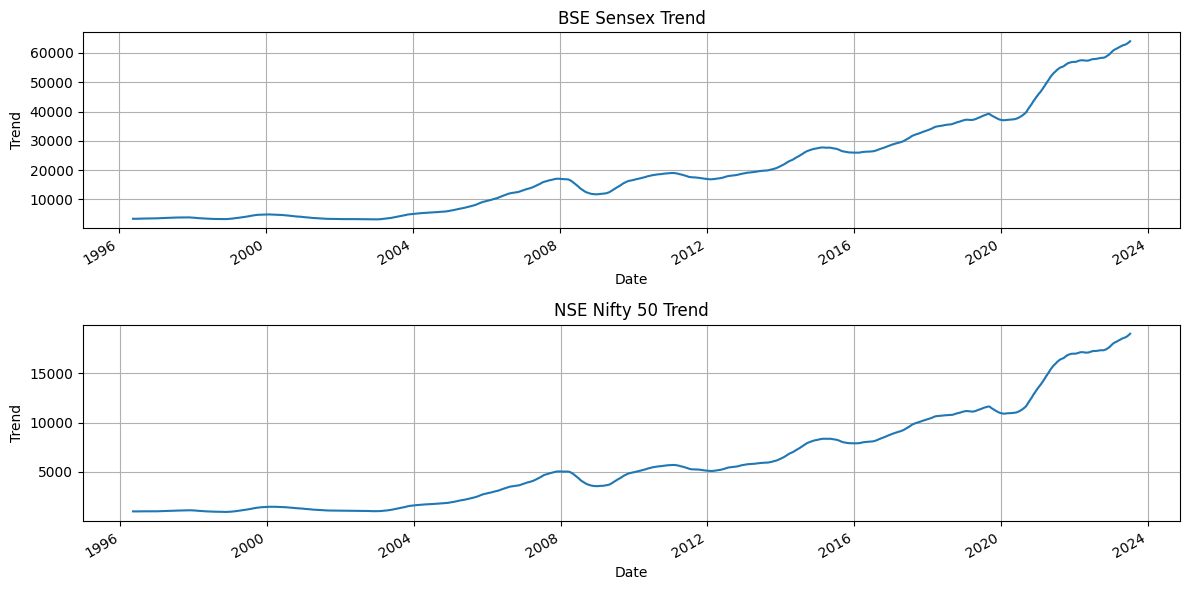

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
result_BSE.trend.plot(title='BSE Sensex Trend', xlabel='Date', ylabel='Trend', grid=True)

plt.subplot(2, 1, 2)
result_NSE.trend.plot(title='NSE Nifty 50 Trend', xlabel='Date', ylabel='Trend', grid=True)

plt.tight_layout()
plt.show()

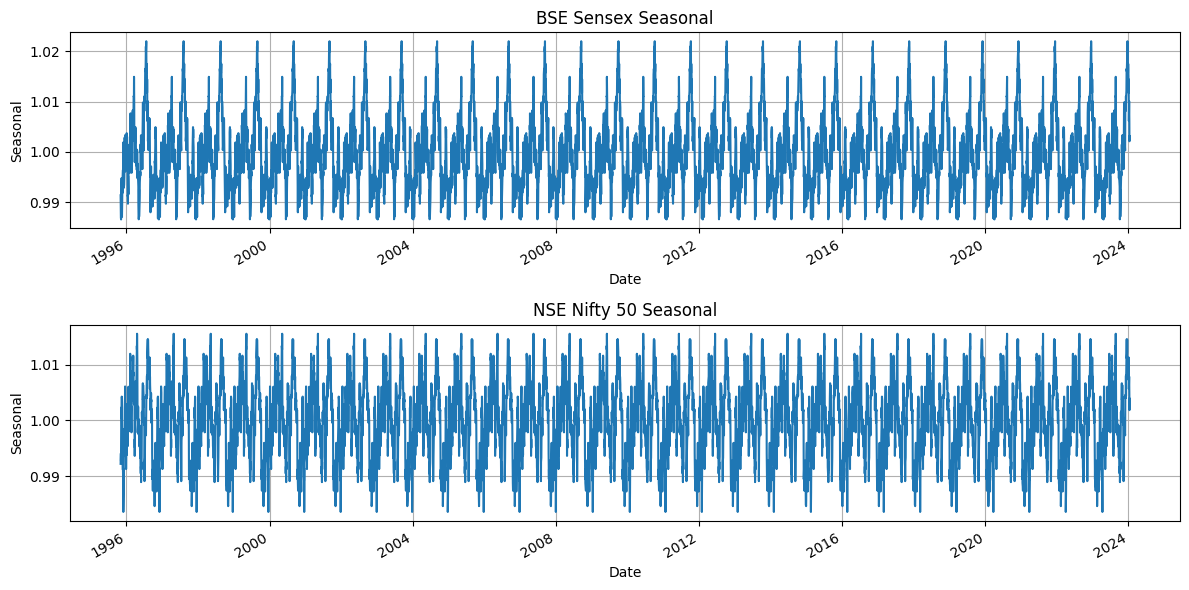

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
result_BSE.seasonal.plot(title='BSE Sensex Seasonal', xlabel='Date', ylabel='Seasonal', grid=True)

plt.subplot(2, 1, 2)
result_NSE.seasonal.plot(title='NSE Nifty 50 Seasonal', xlabel='Date', ylabel='Seasonal', grid=True)

plt.tight_layout()
plt.show()